In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset from kaggle using API command

In [ ]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd

100% 2.58G/2.58G [01:34<00:00, 31.7MB/s]
100% 2.58G/2.58G [01:34<00:00, 29.2MB/s]


Extracting the Zip file

In [ ]:
from zipfile import ZipFile
dataset = '/content/driver-drowsiness-dataset-ddd.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
drowsy_files=os.listdir('/content/Driver Drowsiness Dataset (DDD)/Drowsy')
non_drowsy_files=os.listdir('/content/Driver Drowsiness Dataset (DDD)/Non Drowsy')

In [ ]:
len(drowsy_files)

22348

Slicing the whole data in smaller data to avoid RAM crashing

In [ ]:
drowsy_files=drowsy_files[:2000]

In [ ]:
len(non_drowsy_files)

19445

Slicing the whole data in smaller data to avoid RAM crashing

In [ ]:
non_drowsy_files=non_drowsy_files[:2000]

Making the label

In [ ]:
label=[1]*2000+[0]*2000

In [ ]:
len(label)

4000

Importing all the images given using OpenCV nd resizing it to (192,192,3) to avoid RAM crashing

In [ ]:
data=[]
path='/content/Driver Drowsiness Dataset (DDD)/Drowsy/'
for image_files in drowsy_files:
  image=cv2.imread(path+image_files)
  image=cv2.resize(image,(192,192))
  data.append(image)
path='/content/Driver Drowsiness Dataset (DDD)/Non Drowsy/'
for image_files in non_drowsy_files:
  image=cv2.imread(path+image_files)
  image=cv2.resize(image,(192,192))
  data.append(image)

In [ ]:
len(data)

4000

Changing the data and the label into label

In [ ]:
X=np.array(data)
y=np.array(label)

In [ ]:
X.shape

(4000, 192, 192, 3)

In [ ]:
y.shape

(4000,)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers

Splitting the data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [ ]:
print(X_train.shape, X_test.shape)

(3000, 192, 192, 3) (1000, 192, 192, 3)


Scaling the Images array values by dividing all values by 255

In [ ]:
X_train_sc, X_test_sc = X_train/255, X_test/255

Making a CNN model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(192,192,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(250,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the training data into our CNN model with 25 epochs  and validation split of 10%

In [ ]:
model.fit(X_train_sc,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
85/85 [==============================] - 19s 65ms/step - loss: 0.4883 - accuracy: 0.7378 - val_loss: 0.1806 - val_accuracy: 0.9367
Epoch 2/25
85/85 [==============================] - 4s 48ms/step - loss: 0.0964 - accuracy: 0.9704 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 3/25
85/85 [==============================] - 4s 47ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0325 - val_accuracy: 0.9867
Epoch 4/25
85/85 [==============================] - 4s 53ms/step - loss: 0.0305 - accuracy: 0.9941 - val_loss: 0.0350 - val_accuracy: 0.9900
Epoch 5/25
85/85 [==============================] - 5s 57ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0128 - val_accuracy: 0.9933
Epoch 6/25
85/85 [==============================] - 4s 49ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 7/25
85/85 [==============================] - 4s 47ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0235 - val_accuracy: 0.9967
Epoch 8/25
8

Evaluating the model using testing data

In [ ]:
loss, accuracy = model.evaluate(X_test_sc,y_test)

32/32 [==============================] - 1s 22ms/step - loss: 8.3314e-04 - accuracy: 1.0000


Exporting the model

In [46]:
import pickle

In [47]:
pickle.dump(model,open('drowsy_model.pkl','wb'))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

Now finding the predicted values for the testing data

In [ ]:
y_pred_test = model.predict(X_test_sc)

32/32 [==============================] - 1s 15ms/step


Rounding off all the values in the test data prediction

In [ ]:
y_pred_test = [np.round(i) for i in y_pred_test]

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[488,   0],
       [  0, 512]])

In [ ]:
precision_score(y_test, y_pred_test)

1.0

Now testing the model with random images

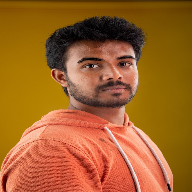

1/1 [==============================] - 0s 27ms/step
[[2.318226e-05]]
Not Drowsy


In [41]:
img=cv2.imread('/content/nondrows.jpg')
img=cv2.resize(img,(192,192))
cv2_imshow(img)
img=img/255
img=np.reshape(img,[1,192,192,3])
pred=model.predict(img)
print(pred)
if np.round(pred)==1:
  print('Drowsy')
else:
  print('Not Drowsy')

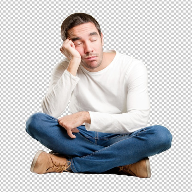

1/1 [==============================] - 0s 33ms/step
[[1.]]
Drowsy


In [42]:
img=cv2.imread('/content/dr.jpg')
img=cv2.resize(img,(192,192))
cv2_imshow(img)
img=img/255
img=np.reshape(img,[1,192,192,3])
pred=model.predict(img)
print(pred)
if np.round(pred)==1:
  print('Drowsy')
else:
  print('Not Drowsy')

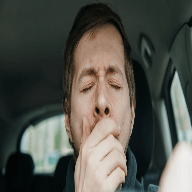

1/1 [==============================] - 0s 30ms/step
[[0.9999932]]
Drowsy


In [43]:
img=cv2.imread('/content/drows.png')
img=cv2.resize(img,(192,192))
cv2_imshow(img)
img=img/255
img=np.reshape(img,[1,192,192,3])
pred=model.predict(img)
print(pred)
if np.round(pred)==1:
  print('Drowsy')
else:
  print('Not Drowsy')

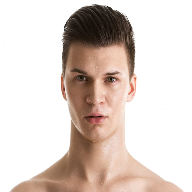

1/1 [==============================] - 0s 29ms/step
[[3.906884e-14]]
Not Drowsy


In [44]:
img=cv2.imread('/content/hand.jpg')
img=cv2.resize(img,(192,192))
cv2_imshow(img)
img=img/255
img=np.reshape(img,[1,192,192,3])
pred=model.predict(img)
print(pred)
if np.round(pred)==1:
  print('Drowsy')
else:
  print('Not Drowsy')

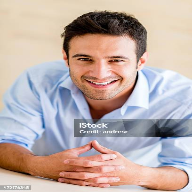

1/1 [==============================] - 0s 20ms/step
[[0.0084303]]
Not Drowsy


In [45]:
img=cv2.imread('/content/hand (1).jpg')
img=cv2.resize(img,(192,192))
cv2_imshow(img)
img=img/255
img=np.reshape(img,[1,192,192,3])
pred=model.predict(img)
print(pred)
if np.round(pred)==1:
  print('Drowsy')
else:
  print('Not Drowsy')